## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset


In [2]:
# Let's have a look at the mouse_metadata

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Let's have a look at study_results

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Now let's combine the 2 data frames into 1 single dataframe

merge_df_unclean = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'inner')
merge_df_unclean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.


In [5]:
# Now let's check the number of mice in this dataframe.
# Since there are multiple records of the same mice for different Timepoint,
# a simple len function on the whole dataset would give us incorrect result.
# Hence, we need to group them first by Mouse ID and then find its length

grouped_df = merge_df_unclean.groupby(['Mouse ID'])
len(grouped_df)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# In order to get duplicates, we can run duplicated function on the merged dataframe
# This will give us all the data for the duplicate Mouse ID

merge_df_duplicate = merge_df_unclean[merge_df_unclean.duplicated()]
merge_df_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [7]:
# In order to clean the dataframe and drop the duplicate row, we can use drop_duplicates method on merge_df_duplicate dataframe

merge_df = merge_df_unclean.drop_duplicates()
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.


In [8]:
# In order to check the number of mice in the clean dataframe and if our dataset is indeed clean,
# we need to first find the total number on mice in unclean dataframe and then in the crean dataframe

print(f"Number of mice in unclean dataframe is {len(merge_df_unclean)}, and in the cleaned dataframe is {len(merge_df)}.")

Number of mice in unclean dataframe is 1893, and in the cleaned dataframe is 1892.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [9]:
# Let's first get the names of Drug Regimen and store them in an array. This array will be used several time in our code

drug_unique = merge_df['Drug Regimen'].unique()
drug_unique

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [10]:
# In order to get Mean, Median, Variance, Dtandard Deviation and SEM for each Drug Regimen,
# we can use a for loop that will take a item form the drug_unique array, compare it to merge_df's Drug Regimen name
# extrace all values realated to that name and perform those mathematical operations.
# Let' first create lists which will hold the data that will be generated by our for loop.
# We will then appennd the values to these lists and then convert it all to a dataframe

drug_name_ar = []
mean_ar = []
median_ar = []
var_ar = []
standard_ar = []
sem_ar = []
for drug in drug_unique:
    drug_name = merge_df.loc[merge_df['Drug Regimen'] == drug, :]
    mean_ar_1 = drug_name['Tumor Volume (mm3)'].mean()
    median_ar_1 = drug_name['Tumor Volume (mm3)'].median()
    var_ar_1 = drug_name['Tumor Volume (mm3)'].var()
    standard_ar_1 = drug_name['Tumor Volume (mm3)'].std()
    sem_ar_1 = drug_name['Tumor Volume (mm3)'].sem()
    drug_name_ar.append(drug)
    mean_ar.append(mean_ar_1)
    median_ar.append(median_ar_1)
    var_ar.append(var_ar_1)
    standard_ar.append(standard_ar_1)
    sem_ar.append(sem_ar_1)
data_summary = [drug_name_ar, mean_ar, median_ar, var_ar, standard_ar, sem_ar]
data_summary_df = pd.DataFrame(data_summary)
data_summary_df = data_summary_df.transpose()
data_summary_df.columns = ['Drug Regimen', 'Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
data_summary_df = data_summary_df.sort_values('Drug Regimen', ascending=True)
data_summary_df = data_summary_df.set_index('Drug Regimen')
data_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.99477,0.329346
Ceftamin,52.5912,51.7762,39.2902,6.26819,0.469821
Infubinol,52.8848,51.8206,43.1287,6.56724,0.492236
Ketapril,55.2356,53.6987,68.5536,8.27971,0.60386
Naftisol,54.3316,52.5093,66.1735,8.13471,0.596466
Placebo,54.0336,52.2889,61.1681,7.821,0.581331
Propriva,52.3683,50.91,42.2781,6.50216,0.514041
Ramicane,40.2167,40.6732,23.4867,4.84631,0.320955
Stelasyn,54.2331,52.4317,59.4506,7.71042,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

In [11]:
# For this method, we can use a groupby function on Drug Regimen
# and then apply the mathematical operations on Tumor Volume (mm3)

mean_1 = merge_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_1 = merge_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance_1 = merge_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_1 = merge_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem_1 = merge_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

data_summary_df_2a = pd.DataFrame(mean_1)
data_summary_df_2 = data_summary_df_2a.rename(columns={"Tumor Volume (mm3)": "Mean"})

data_summary_df_2["Median"] = median_1
data_summary_df_2["Variance"] = variance_1
data_summary_df_2["Standard Deviation"] = standard_1
data_summary_df_2["SEM"] = sem_1

data_summary_df_2

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

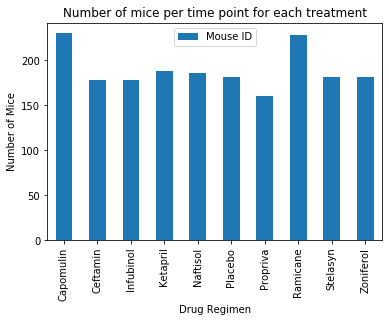

In [12]:
# Now, we need to plot this data using Bar Plots and pandas

x_axis_data_1 = merge_df.groupby('Drug Regimen').count()['Mouse ID']
x_axis_data = pd.DataFrame(x_axis_data_1)
x_axis_data.plot.bar(rot=90)
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.title("Number of mice per time point for each treatment")
plt.show()

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

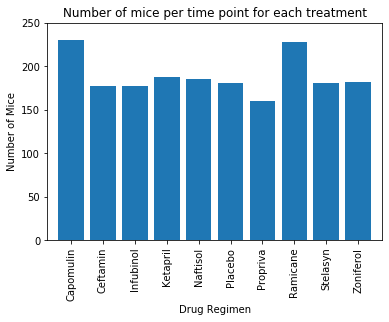

In [13]:
# Here, we need to plot this data using Bar Plots and pyplot

x_axis = np.arange(len(x_axis_data_1))
tick_locations = [x for x in x_axis]
plt.figure(figsize=(6,4))
bar_2 = x_axis_data.reset_index()
plt.bar(x_axis, x_axis_data['Mouse ID'], align="center")
plt.xticks(tick_locations, bar_2['Drug Regimen'],rotation="vertical")
plt.xlim(-0.75, len(x_axis_data_1)-.25)
plt.ylim(0, 250)
plt.title("Number of mice per time point for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

## Pie Plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [14]:
# In order to find gender distribution, we first need to group the mice by their Sex

gender = mouse_metadata.groupby('Sex').count()
gender

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


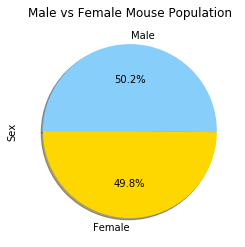

In [15]:
# We can now plot the data using Pie Plot

colors = ["gold", "lightskyblue"]
plt.pie(gender['Mouse ID'], labels=list(gender.index), colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

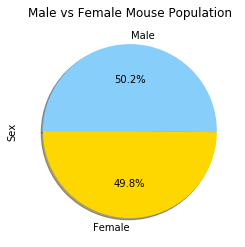

In [16]:
# Here, we have to plot the same Pie Plot but using pyplot this time

colors = ["gold", "lightskyblue"]
secondpie = gender["Mouse ID"].plot.pie(y='sizes', figsize=(4, 4), autopct="%1.1f%%", startangle=180, shadow=True,colors=colors)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [17]:
# in order to calculate IQR and potential outliers, let's create a function
# This function will take the drug name is input, and calculate IQR and potential outliers
# It will then print the results for the Drug Regimen 

# Function
def timepoint_calc(drug_name):
    drug_df_1c = merge_df.loc[merge_df["Drug Regimen"] == drug_name, :]
    drug_df_2c = drug_df_1c.groupby('Mouse ID').max()['Timepoint']
    drug_df_3c = pd.DataFrame(drug_df_2c)
    drug_df_3c_merge = pd.merge(drug_df_3c, merge_df, on=("Mouse ID","Timepoint"),how="left")

    tumors = drug_df_3c_merge["Tumor Volume (mm3)"]

    quartiles = tumors.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = (upperq-lowerq)

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug_name}'s potential outliers could be values below {lower_bound} and values above {upper_bound}, and it's IQR is {iqr}.")

for drug_name in drug_unique:
    print(timepoint_calc(drug_name))

Ramicane's potential outliers could be values below 17.912664470000003 and values above 54.30681135, and it's IQR is 9.098536719999998.
None
Capomulin's potential outliers could be values below 20.70456164999999 and values above 51.83201549, and it's IQR is 7.781863460000004.
None
Infubinol's potential outliers could be values below 36.83290494999999 and values above 82.74144559000001, and it's IQR is 11.477135160000003.
None
Placebo's potential outliers could be values below 30.15582196999999 and values above 90.92136789000001, and it's IQR is 15.191386480000006.
None
Ceftamin's potential outliers could be values below 25.355449580000002 and values above 87.66645829999999, and it's IQR is 15.577752179999997.
None
Stelasyn's potential outliers could be values below 27.53557243999998 and values above 94.04496758000002, and it's IQR is 16.62734878500001.
None
Zoniferol's potential outliers could be values below 24.77952216500001 and values above 92.00293628499998, and it's IQR is 16.8058

In [18]:
# In order to find four of the most promising treatment regimens, we need to find the decrease/increase in tumor volume per drug
# To get that, we need to know the size of each tumor at the end of recorded Timepoint

best_drug_1 = merge_df.groupby('Mouse ID').max()['Timepoint']
best_drug_2 = pd.DataFrame(best_drug_1)
best_drug_2.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [19]:
# Now that we have the above information, we can merge the above dataframe with merge_df using left joint
# We'll also sort the values by Tumor Volume (mm3)

best_drug_3 = pd.merge(best_drug_2, merge_df, on=("Mouse ID","Timepoint"),how="left")
best_drug_3 = best_drug_3.sort_values('Tumor Volume (mm3)')
best_drug_3.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
97,k403,45,Ramicane,Male,21,16,22.050126,1
175,s185,45,Capomulin,Female,3,17,23.343598,1
122,m601,45,Capomulin,Male,22,17,28.430964,1
227,x401,45,Capomulin,Female,16,15,28.484033,0
70,g791,45,Ramicane,Male,11,16,29.128472,1


In [20]:
# Now we need to find the best 4 performing drugs
# We can write a for loop that will take 1 element in drug_unique (which we created above),
# compare that to the best_drug_3 dataframe that we just created,
# find the minimum value of tumor volume and save the name of the corrosponding drug and it's tumor volume in a dataframe

drug_name_a = []
tumor_volume = []
for b in drug_unique:
    best_drug_4 = best_drug_3.loc[best_drug_3['Drug Regimen'] == b, :]
    best_drug_5 = best_drug_4['Tumor Volume (mm3)'].min()
    drug_name_a.append(b)
    tumor_volume.append(best_drug_5)
best_drug_6 = pd.DataFrame(tumor_volume, drug_name_a)
best_drug_6.reset_index(inplace=True)
index = ['Drug Name', 'Tumor Volume (mm3)']
best_drug_6.columns = index
best_drug_6 = best_drug_6.sort_values(['Tumor Volume (mm3)', 'Drug Name'], ascending=True)
best_drug_6

,Drug Name,Tumor Volume (mm3)
0,Ramicane,22.050126
1,Capomulin,23.343598
2,Infubinol,36.321346
4,Ceftamin,45.000000
7,Ketapril,45.000000
9,Naftisol,45.000000
3,Placebo,45.000000
8,Propriva,45.000000
5,Stelasyn,45.000000
6,Zoniferol,45.000000


In [21]:
#In order to get the top 4 drugs, we can use .head(4) on Drug Name column of best_drug_6 dataframe

best_drug_7 = best_drug_6['Drug Name'].head(4)
best_drug_7

0     Ramicane
1    Capomulin
2    Infubinol
4     Ceftamin
Name: Drug Name, dtype: object

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [22]:
# Now, let's make a function that will again take the drug name is input,
# find the max timepoint related to that drug, merge it with the original dataframe using left joint
# and return a dataframe for all the mice treated with that drug and final tumor volume

# Function
def timepoint_calc_1(drug_name):
    drug_df_new_1 = merge_df.loc[merge_df["Drug Regimen"] == drug_name, :]
    drug_df_new_1 = drug_df_new_1.groupby('Mouse ID').max()['Timepoint']
    drug_df_new_2 = pd.DataFrame(drug_df_new_1)
    drug_df_new = pd.merge(drug_df_new_2, merge_df, on=("Mouse ID","Timepoint"),how="left")
    tumors = drug_df_new["Tumor Volume (mm3)"]
    return(drug_df_new)

In [23]:
# We now need to have the column Tumor Volume (mm3) for each of the best 4 performing drug

tumors1a = timepoint_calc_1(best_drug_7.iloc[0])
tumors1 = tumors1a['Tumor Volume (mm3)']

tumors2a = timepoint_calc_1(best_drug_7.iloc[1])
tumors2 = tumors2a['Tumor Volume (mm3)']

tumors3a = timepoint_calc_1(best_drug_7.iloc[2])
tumors3 = tumors3a['Tumor Volume (mm3)']

tumors4a = timepoint_calc_1(best_drug_7.iloc[3])
tumors4 = tumors4a['Tumor Volume (mm3)']

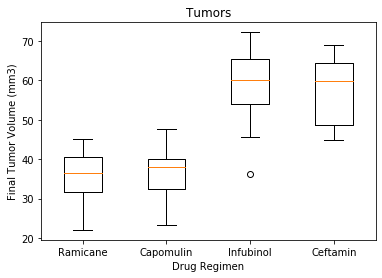

In [24]:
# We can now plot our boxplot using all this information

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

data_to_plot = [tumors1, tumors2, tumors3, tumors4]

ax1.boxplot(data_to_plot, labels=[best_drug_7.iloc[0],best_drug_7.iloc[1],best_drug_7.iloc[2],best_drug_7.iloc[3]])
plt.show()

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [25]:
# Let's find the Mouse ID for the Capomulin drug which had the best results

best_drug_3d = best_drug_3.loc[best_drug_3['Drug Regimen'] == 'Capomulin', :]
best_mouse_id = best_drug_3d['Mouse ID'].iloc[0]
best_mouse_id

's185'

In [26]:
# We can use timepoint_calc_1 function that we created above to get all the data for the choosen Mouse ID and Drug

value_1 = timepoint_calc_1('Capomulin')
best_result_df = merge_df.loc[merge_df["Mouse ID"] == best_mouse_id,:]
best_result_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


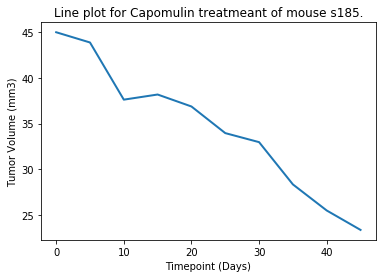

In [27]:
# Let us plot this using Line Plot

x_axis_lp = best_result_df["Timepoint"]
lp_df = best_result_df["Tumor Volume (mm3)"]

plt.title(f"Line plot for Capomulin treatmeant of mouse {best_mouse_id}.")
plt.plot(x_axis_lp, lp_df, linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



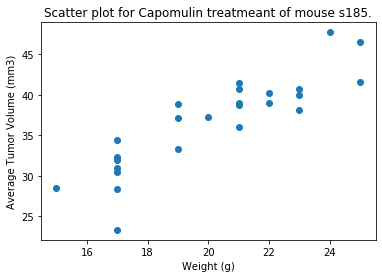

In [28]:
# Let's plot a scatter plot

sp_mean = value_1.groupby(['Mouse ID']).mean()
plt.scatter(sp_mean['Weight (g)'],sp_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title(f"Scatter plot for Capomulin treatmeant of mouse {best_mouse_id}.")
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


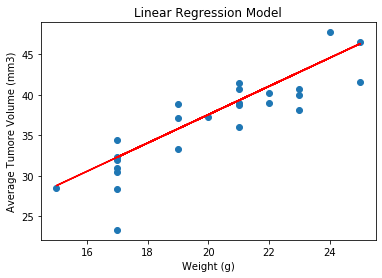

In [29]:
# Let's calculate Pearson's coefficent, slope, intercept, rvalue, pvalue, stderr, regress_values
# and plot the results

rpearson_coefficent = st.pearsonr(value_1['Weight (g)'], value_1['Tumor Volume (mm3)'])[0]
slope, intercept, rvalue, pvalue, stderr = st.linregress(value_1['Weight (g)'],value_1['Tumor Volume (mm3)'])
regress_values = slope * ((value_1['Weight (g)']) + intercept)

plt.scatter(sp_mean['Weight (g)'],sp_mean['Tumor Volume (mm3)'])
plt.plot(sp_mean['Weight (g)'], regress_values, "-r")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.title('Linear Regression Model')
plt.show()